<a href="https://colab.research.google.com/github/FelipeMu/memoria2024-testing/blob/main/test1_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lectura de archivo
 Se procede a leer el archivo con extensión '.csv' - señal de PAM y VFSC (sujeto G1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv

# Arreglo para almcenar los datos de las senales
G1_PAM = [] # PAM: Presión Arterial Media
G1_VSC = [] # VSC: Velocidad Sanguínea Cerebral

# Abre el archivo CSV en modo lectura
with open('/content/drive/MyDrive/Trabajo de titulación/Lectura y T.Wavelet/G2_001.csv', newline='') as csvfile:
    # Lee el archivo CSV usando el lector CSV
    csv_reader = csv.reader(csvfile)

    # Itera sobre cada fila en el archivo CSV
    for row in csv_reader:
        # Cada fila se convierte en una lista de valores, donde cada valor representa una celda en esa fila
        G1_PAM.append(row[0])
        G1_VSC.append(row[1])
#Se elimina los nombre de las filas PAM y VFSC que estaban contenidas dentro de los arreglos
del G1_PAM[0]
del G1_VSC[0]

# Verificar arreglos de la señal G1 (PAM y VSC)
print(G1_PAM)
print(G1_VSC)

['126.63', '124.02', '121.81', '119.98', '118.47', '117.26', '116.30', '115.55', '114.99', '114.57', '114.15', '113.80', '113.53', '113.35', '113.23', '113.05', '113.00', '113.13', '113.52', '114.43', '115.50', '116.66', '117.80', '118.86', '119.75', '120.40', '120.44', '120.20', '119.75', '119.20', '118.64', '118.06', '117.49', '116.96', '116.70', '116.52', '116.38', '116.27', '116.09', '115.80', '115.52', '115.30', '115.16', '115.22', '115.39', '115.62', '115.90', '116.35', '116.76', '117.04', '117.07', '116.40', '115.56', '114.65', '113.79', '113.50', '113.34', '113.29', '113.30', '113.30', '113.16', '113.05', '113.01', '113.05', '113.23', '113.54', '113.96', '114.51', '115.40', '116.48', '117.44', '118.15', '117.91', '117.25', '116.43', '115.60', '115.53', '115.62', '115.81', '116.03', '116.18', '116.02', '115.83', '115.64', '115.49', '115.51', '115.67', '115.85', '116.02', '116.09', '116.06', '115.97', '115.85', '115.68', '115.48', '115.27', '115.06', '114.87', '114.78', '114.70',

# Preprocesamiento
Se analizan los datos del archivo '.csv' antes de los respectivos análisis

In [ ]:
# Se procede a realizar preprocesamiento de los datos a estudiar

# Se analizan si tienen el mismo largo ambos arreglos de la senal G1
len_distinto = False
if len(G1_PAM) != len(G1_VSC):
  len_distinto = True
  print('Arreglos PAM y VSC con distinto largo.\n')


# Verificacion de valores nulos:
i = 0
vacios_PAM = 0
vacios_VSC = 0
while (i < len(G1_PAM)):
  if G1_PAM[i] == '':
    vacios_PAM = vacios_PAM + 1
  if G1_VSC[i] == '':
    vacios_VSC = vacios_VSC + 1
  i = i + 1
# Revision de valores nulos en el arreglo de la senal PAM
if vacios_PAM != 0:
  print('Arreglo señal PAM con ', vacios_PAM, 'vacíos.\n')
# Revision de valores nulos en el arreglo de la senal VSC
if vacios_VSC != 0:
  print('Arreglo señal VSC con ', vacios_VSC, 'vacíos.\n')


# Aplicación de la transformada Wavelet
**¿Que realiza la T.Wavelet?**
La transformación de la WT se realiza a través de una función llamada wavelet (o wavelet madre), con la que se descompone una señal en diferentes componentes de frecuencia que conforman una familia de funciones que son traslaciones y dilataciones de una función madre ψ (t). Este proceso de traslación y dilatación.



Se estudia cúal de las familias de la T.Wavelets (Wavelets families) es la que genera menor error al aplicar su T. wavelet inversa
inf: https://pywavelets.readthedocs.io/en/latest/regression/wavelet.html

**Información de las familias de Wavelets**
La calidad de la información obtenida a partir de un análisis donde se aplica la WT depende en gran medida de la wavelet madre utilizada, de modo que se debe considerar como una "*etapa dentro del análisis*" por WT la selección de una wavelet madre adecuada para cada caso particular de estudio (Gómez etc al., 2013)

**Dado la naturaleza de los datos es utilizará la CWN (Continuous Wavelet Transform).**

**A considerar:**


1.   Longitud de los filtros (Capacidad de capturar detalles finos vs Complejidad computacional)
2.   []



In [ ]:
!pip install --upgrade pywavelets


In [ ]:
# Familias de Wavelets mas utilizadas comunmente: NO FUNCIONA ***
import pywt
import numpy as np
import matplotlib.pyplot as plt


pywt.families()

# Obtener una lista completa de cada familia Wavelets
for family in pywt.families():
    print("%s family: " % family + ', '.join(pywt.wavelist(family)))



###########################################
##### Creación del un objeto Wavelet ######
###########################################

# Probando...

import numpy as np
import pywt
import matplotlib.pyplot as plt

# Familias de wavelets disponibles
wavelet_families = ['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']

# Diccionario para almacenar los errores de cada wavelet
wavelet_errors = {}

# Calcular el error para cada wavelet
for wavelet_family in wavelet_families:
    print(wavelet_family)
    # Aplicar la transformada de wavelet con la familia actual
    coefficients, frequencies = pywt.cwt(G1_PAM, np.arange(1, 128), wavelet_family)

    # Reconstruir la señal a partir de los coeficientes
    reconstructed_signal = pywt.icwt(coefficients, wavelet_family, frequencies)

    # Calcular el error entre la señal original y la reconstruida
    error = np.mean(np.abs(G1_PAM - reconstructed_signal))

    # Almacenar el error en el diccionario
    wavelet_errors[wavelet_family] = error

# Encontrar la wavelet con el menor error
best_wavelet = min(wavelet_errors, key=wavelet_errors.get)
min_error = wavelet_errors[best_wavelet]

# Mostrar resultados
print("La wavelet con el menor error es:", best_wavelet)
print("El error mínimo es:", min_error)

# Graficar los errores de cada wavelet
plt.bar(wavelet_errors.keys(), wavelet_errors.values())
plt.xlabel('Wavelet')
plt.ylabel('Error')
plt.title('Errores de Reconstrucción para Diferentes Wavelets')
plt.xticks(rotation=45, ha='right')
plt.show()



**A considerar:**
1.   plt.imshow() se utiliza para mostrar la matriz de coeficientes de la CWT como *una imagen*.
2.   La función np.abs() se usa para tomar el valor absoluto de los coeficientes para la visualización.
3.   El argumento cmap='jet' define el mapa de colores que se utilizará para representar la amplitud de los coeficientes.




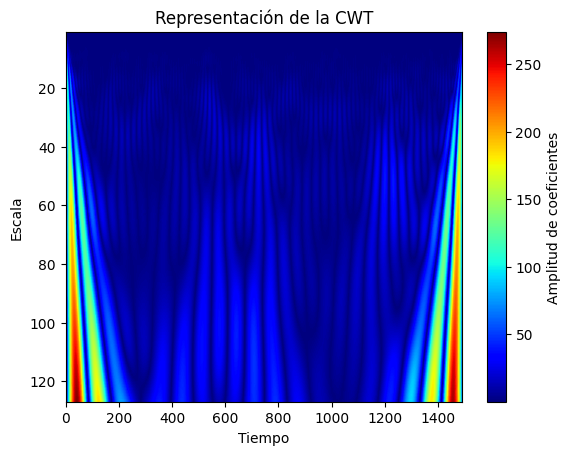

1
2
3


In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt


# Parametros para la CWT
scales = np.arange(1, 128)  # Escalas de análisis
wavelet = 'morl'  # Wavelet a utilizar

# Aplicar CWT (Continuous Wavelet Transform)
coefficients, frequencies = pywt.cwt(G1_PAM, scales, wavelet)

# Visualizar la representacion de la CWT
plt.imshow(np.abs(coefficients), extent=[0, len(G1_PAM), scales[-1], scales[0]], cmap='jet', aspect='auto')
plt.colorbar(label='Amplitud de coeficientes')
plt.xlabel('Tiempo')
plt.ylabel('Escala')
plt.title('Representación de la CWT')
plt.show()


a = [1, 2,3]
for i in a:
  print(i)